In [1]:
import tensorflow as tf
import os

In [2]:
# TO ACTIVATE GPU TURN ON "py310" kernel in RIGHT TOP CORNER OF THIS PAGE.

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    # True parameter enables memory growth mode
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    # limiting increasing memory usage
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove damaged or incorrect images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'Images'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_class = ['Happy people', 'Sad people']

In [9]:
os.listdir(data_dir)

['Happy people', 'Sad people']

In [9]:
# loop through folders names(Happy people, Sad people)
for image_class in os.listdir(data_dir):
    # loop through every image in each folder
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # grab a single image by stating data directory, image folder and image itself:
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image)
            # check if images matches path in image_exts variable:
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list Images\Happy people\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list Images\Happy people\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list Images\Happy people\diversity-portrait-happy-colleagues-smile-260nw-2312975421.jpg
Image not in ext list Images\Happy people\fb6656da-eef3-4374-8474-395aa2c14a08.zip
Image not in ext list Images\Happy people\smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list Images\Sad people\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list Images\Sad people\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list Images\Sad people\depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in ext list Images\Sad people\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list Images\Sad people\f239f14c-4de4-42df-bbbc-6cc0eb2e70f0.zip
Image not i

# Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# do a lot of preprocessing with one function
data = tf.keras.utils.image_dataset_from_directory('Images')

Found 191 files belonging to 2 classes.


In [12]:
# convert data to numpy iterator because "data" is generator in the previous line
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [20]:
# batch now have shape of 2. There are 2 parts: 1-images, 2-labels.
batch[1]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [23]:
# if we look at amount of batches, we've got 6 batches
len(data)

6

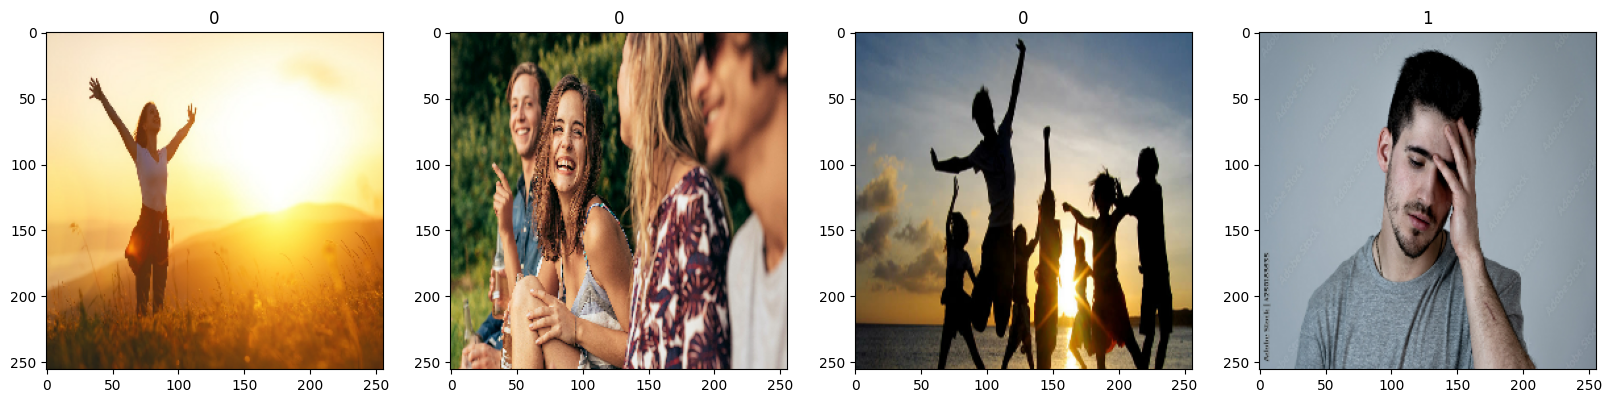

In [18]:
# Check which class is assigned to which type of image:
# We can see it assigned 0 to happy people and 1 to sad people
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preparing Data

### Scale Data

In [19]:
# When we are loading images, and there is a 3 channels, its gonna be eather RGB or GBR 
# and these images represented from 0 to 255. But we need to turn them into 0 and 1 so its a lot easyer to handle.
# So we just devide all values by 255, it will give as values between 0 and 1
# scaled = batch[0] / 255

# To do it more professionaly, we do this:
data = data.map(lambda x,y: (x/255, y))

### Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [31]:
# take first 4 batches
train = data.take(train_size)
# skip first 4 batches and grab 1 batch
val = data.skip(train_size).take(val_size)
# skip previous 5 batches and grab the last batch
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

### Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Conv2D - convolutional layer
# MaxPooling2D - condensing layer that condenses images
# Dense - fully connected layer
# Flatten - allows us to go for convolutional layer, which has channels.
# Dropout - used for reguralisation

In [34]:
model = Sequential()

In [35]:
# 16 - number of filters that tries to extract information from picture
# (3, 3) - filter is going to be 3px by 3px in size
# 1 - stride of 1, that means it gonna move 1 px each time
# input_shape gonna be 256px in height, 255px in wide and 3 channels deep.
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# This will gonna condence image data:
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# It will essentially allow us to pass this filters to the next Dense layer by condensing inputs 
# from multidimentional to single dimentional
model.add(Flatten())

# These next layers are fully connected. We have 256 neurons.
model.add(Dense(256, activation='relu'))
# Final layer with single output
# sigmoid converts input to 0 or 1
model.add(Dense(1, activation='sigmoid'))

In [36]:
# losses for binary classification problem is loss=tf.losses.BinaryCrossentropy()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [38]:
logdir='logs'

In [39]:
# when we want to save our model and return back to it
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
# epohcs is how long are we gonna train our model. 1 epoch is 1 run over our entire set of data.
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 347ms/step - loss: 2.4770 - accuracy: 0.4688 - val_loss: 0.7937 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 2s 287ms/step - loss: 0.6563 - accuracy: 0.6094 - val_loss: 0.6436 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 2s 281ms/step - loss: 0.6280 - accuracy: 0.6172 - val_loss: 0.6237 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 2s 278ms/step - loss: 0.6233 - accuracy: 0.6484 - val_loss: 0.6187 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 2s 286ms/step - loss: 0.6145 - accuracy: 0.6172 - val_loss: 0.5703 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 2s 279ms/step - loss: 0.5621 - accuracy: 0.6406 - val_loss: 0.5542 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 2s 281ms/step - loss: 0.5086 - accuracy: 0.7500 - val_loss: 0.5726 - val_accuracy: 0.6562
Epoch 8/20
4/4 [====

## Plot Performance

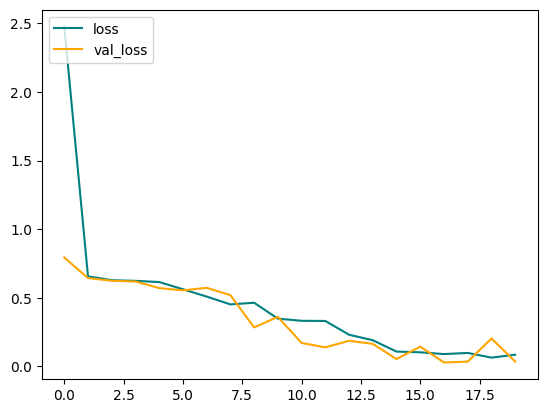

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

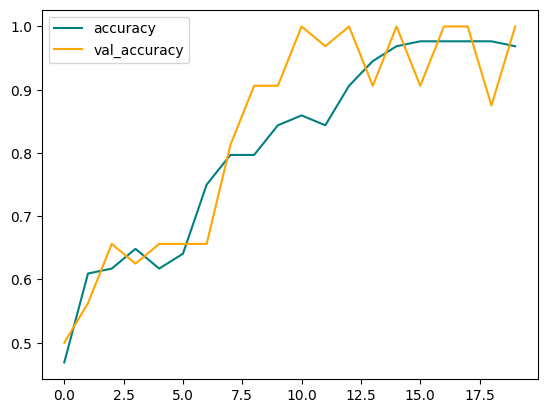

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    # X - set of images. y - true value
    X, y = batch
    # get predictions
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 705ms/step


In [49]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8888888955116272, Recall: 1.0, Accuracy: 0.9677419066429138


### Test

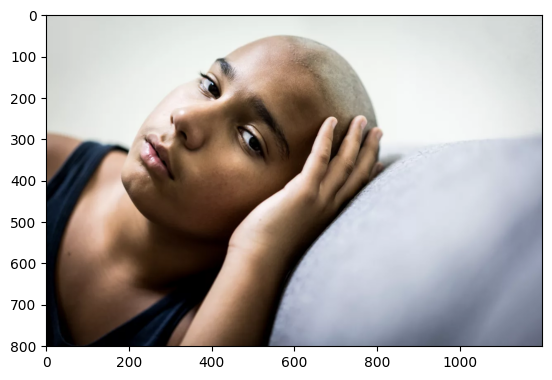

In [57]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

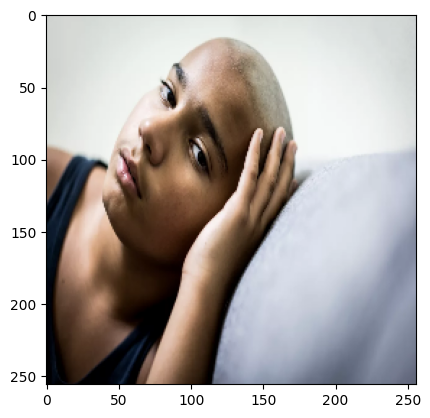

In [58]:
# OUR IMAGE SHOULD BE 256x256!!!, so we resize it
resize = tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB).astype(int))
plt.show()

In [59]:
# our neural network expects us to pass through a batch of images, not a single images, 
# so we need to incapsulate it inside of an array by np.expand_dims
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [61]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad


# Save the Model

In [62]:
from tensorflow.keras.models import load_model

In [64]:
# to save model
model.save(os.path.join('models', 'happysadmodel.h5'))

In [66]:
# to load model
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [68]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [69]:
if yhat_new > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad
